# 程式 2.1: 利用平均(期望)獎金找出最佳動作

In [1]:
def get_best_action(actions,history):
    best_action = 0
    max_action_value = 0
    for i in range(len(actions)):
        cur_action_value = exp_reward(actions[i],history) #這個函式可以用NumPy的argmax()來取代，請參考程式2.5
        if cur_action_value > max_action_value:
            best_action = i #若cur_action_value比較大，即更新索引best_action的值
            max_action_value = cur_action_value
    return best_action

# 程式 2.2: 設定ε值及不同拉霸機的中獎率

In [2]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt 

n = 10 #設定拉霸機的數量
probs = np.random.rand(n) #隨機設定不同拉霸機的中獎率（0～1之間）
eps = 0.2 #設定ε為0.2

# 程式 2.3: 把中獎率轉成中獎金額

In [3]:
def get_reward(prob): #prob為某臺拉霸機的中獎率，注意prob和之前的probs不同，probs是所有拉霸機的中獎率構成的陣列
    reward = 0
    for i in range(10): 	
        if random.random() < prob: #編註：因為random()會產生均勻分佈的亂數，所以在10次迴圈中，產生的亂數值小於prob的次數會正比於prob的大小
            reward += 1 #若隨機產生的數字小於中獎率，就把reward加1
    return reward #傳回reward值(存有本次遊戲中開出的獎金)

In [4]:
np.mean([get_reward(0.7) for _ in range(2000)]) #執行2000次get_reward()，並取結果的平均值

7.0455

In [5]:
sum = 0
x = [4, 5, 6, 7]
for i in range (len(x)):
    sum = sum +x[i]
print(sum)

22


In [6]:
record = np.zeros((10,2))
record

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

# 程式 2.4：更新record內容

In [7]:
def update_record(record,action,r):
    r_ave = (record[action,0] * record[action,1] + r) / (record[action,0] + 1) #算出新的平均值
    record[action,0] += 1 #action號機台的拉桿次數加1
    record[action,1] = r_ave #更新該機台的平均獎金
    return record

# 程式 2.5：找出最佳動作

In [8]:
def get_best_arm(record):
    arm_index = np.argmax(record[:,1]) #找出record中第一行的元素中，值最大的元素索引
    return arm_index

# 程式 2.6：解決多臂拉霸機問題

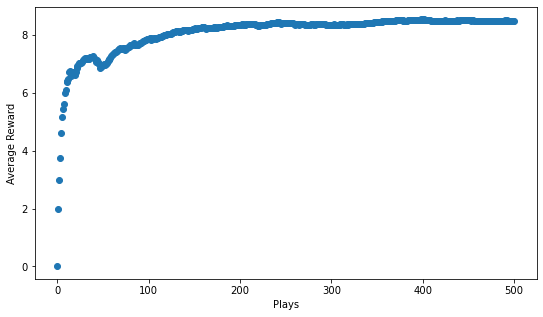

In [9]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Average Reward")
fig.set_size_inches(9,5)
record = np.zeros((n,2)) #先產生一個初始值全部為零的record陣列
probs = np.random.rand(n) #隨機決定每台拉霸機的中獎率
rewards = [0] #記錄每次拉桿後，計算出的總體平均獎金
for i in range(500):
    if random.random() > eps: #利用（找出平均獎金最高的機台號碼choice，之前我們叫做action）
        choice = get_best_arm(record)
    else: #探索（隨機選出一個機台號碼）
        choice = np.random.randint(10)
    r = get_reward(probs[choice]) #取得此次遊戲會得到的獎金
    record = update_record(record,choice,r) #更新record陣列中與該拉霸機號碼對應的遊戲次數和平均獎金
    mean_reward = ((i+1) * rewards[-1] + r)/(i+2) #計算最新的總體平均獎金
    rewards.append(mean_reward) #記錄到rewards串列
ax.scatter(np.arange(len(rewards)),rewards) #畫出散佈圖

# 程式 2.7：softmax函式

In [10]:
def softmax(av, tau=1.12):#av即動作價值陣列，tau即溫度參數（預設值=1.12）
    softm = ( np.exp(av / tau) / np.sum( np.exp(av / tau) ) )
    return softm

In [11]:
action = np.arange(10) #產生一個對應到拉霸機號碼的數字陣列
action

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
action_value = np.zeros(10) #將所有動作的價值初始化為0
p = softmax(action_value) #把動作價值轉換為機率值，並存進陣列p中
p

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [13]:
np.random.choice(action, p=p) #按照陣列p中的機率分佈隨機選擇一個動作

1

# 程式 2.8：使用softmax解決多臂拉霸機問題

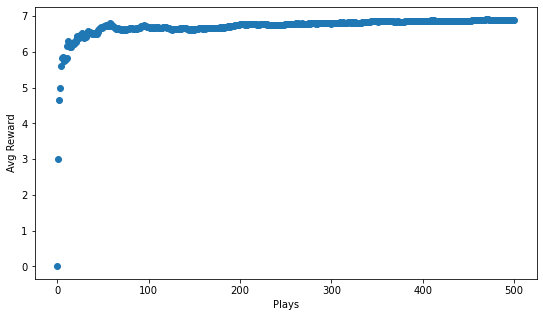

In [14]:
n = 10
probs = np.random.rand(n)
record = np.zeros((n,2))
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
fig.set_size_inches(9,5)
rewards = [0]
for i in range(500):
    p = softmax(record[:,1],tau=0.7) #根據每個動作的價值計算出相應的機率值
    choice = np.random.choice(np.arange(n),p=p) #根據p陣列中的機率分佈隨機選擇一個動作
    r = get_reward(probs[choice])
    record = update_record(record,choice,r)
    mean_reward = ((i+1) * rewards[-1] + r)/(i+2) #計算最新的總體平均獎金
    rewards.append(mean_reward)
ax.scatter(np.arange(len(rewards)),rewards) #畫出散佈圖

In [15]:
import torch
torch.Tensor([[1,2,3],[4,5,6]])

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [16]:
Y = torch.Tensor([[1,2,3],[4,5,6]])
Y.shape

torch.Size([2, 3])

In [17]:
X = torch.Tensor([1,2,3])
X.shape

torch.Size([3])

In [18]:
x = torch.Tensor([2,4]) #建立值為[2,4]的張量作為輸入張量
m = torch.randn(2, requires_grad = True) #隨機產生一個『斜率』的張量
b = torch.randn(1, requires_grad = True) #隨機產生一個『截距』的張量
y = m*x + b #線性模型
y_known = torch.Tensor([5,9]) #建立值為[5,9]的張量作為標籤張量（label)
loss = (torch.sum(y_known-y)) ** 2 #建立損失函數（這裡選擇的是最簡單的平方誤差函數）
loss.backward() #執行反向傳播計算梯度
m.grad #利用grad屬性即可得到m張量的梯度

tensor([ -53.5109, -107.0218])

# 程式 2.9：建立情境式拉霸機的環境

In [19]:
import numpy as np
import random

class ContextBandit: #拉霸機環境類別
    def __init__(self, arms=10):
        self.arms = arms #這裡的arm代表廣告
        self.init_distribution(arms)
        self.update_state()

    def init_distribution(self, arms):
        states = arms  # 讓狀態數=廣告數以方便處理
        self.bandit_matrix = np.random.rand(states,arms) #隨機產生的10種狀態下的10個arms的機率分佈（10*10種機率）

    def reward(self, prob): #用途與前面的程式2.3相同
        reward = 0
        for i in range(self.arms):
            if random.random() < prob:
                reward += 1
        return reward

    def update_state(self):
        self.state = np.random.randint(0,self.arms) #隨機產生一個新狀態

    def get_state(self): #取得當前狀態
        return self.state

    def get_reward(self,arm):
        return self.reward(self.bandit_matrix[self.get_state()][arm]) #根據當前狀態及選擇的arm傳回回饋值
    
    def choose_arm(self, arm): 
        reward = self.get_reward(arm)
        self.update_state() #產生下一個狀態
        return reward #傳回回饋值

In [20]:
env = ContextBandit(arms=10) #創建一個環境
state = env.get_state() #取得當前狀態
reward = env.choose_arm(1) #在目前的狀態下選擇推送1號網站的廣告，並計算其回饋值
print(state,reward)

7 9


In [21]:
import numpy as np
import torch
arms = 10
N, D_in, H, D_out, = 1, arms, 100, arms

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H), #隱藏層
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out), #輸出層
    torch.nn.ReLU(),
)

loss_fn = torch.nn.MSELoss()
env = ContextBandit(arms)

In [22]:
def one_hot(N, pos, val=1):
	one_hot_vec = np.zeros(N)
	one_hot_vec[pos] = val
	return one_hot_vec

A = one_hot(10, 4) #假設目前的狀態號碼為4
print(A)

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# 程式 2.10：主要訓練迴圈

In [23]:
def train(env, epochs=10000, learning_rate=1e-2): #執行10000次訓練
    cur_state = torch.Tensor(one_hot(arms,env.get_state())) #取得環境目前的狀態，並將其編碼為one-hot張量
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    rewards = []
    for i in range(epochs):
        y_pred = model(cur_state) #執行神經網路並預測回饋值
        av_softmax = softmax(y_pred.data.numpy(), tau=1.12) #利用程式2.7定義的softmax()將預測結果轉換成機率分佈向量
        choice = np.random.choice(arms, p=av_softmax) #依照softmax輸出的機率分佈來選取新動作
        cur_reward = env.choose_arm(choice) #執行選擇的動作，並取得一個回饋值
        one_hot_reward = y_pred.data.numpy().copy() #將資料型別由PyTorch張量轉換成Numpy陣列
        one_hot_reward[choice] = cur_reward #更新one_hot_reward陣列的值，把它當作標籤（實際的回饋值）
        reward = torch.Tensor(one_hot_reward)
        rewards.append(cur_reward) #將回饋值存入rewards中，以便稍後繪製線圖
        loss = loss_fn(y_pred, reward)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        cur_state = torch.Tensor(one_hot(arms,env.get_state())) #更新目前的環境狀態
    return np.array(rewards)
rewards = train(env) #開始訓練10000次

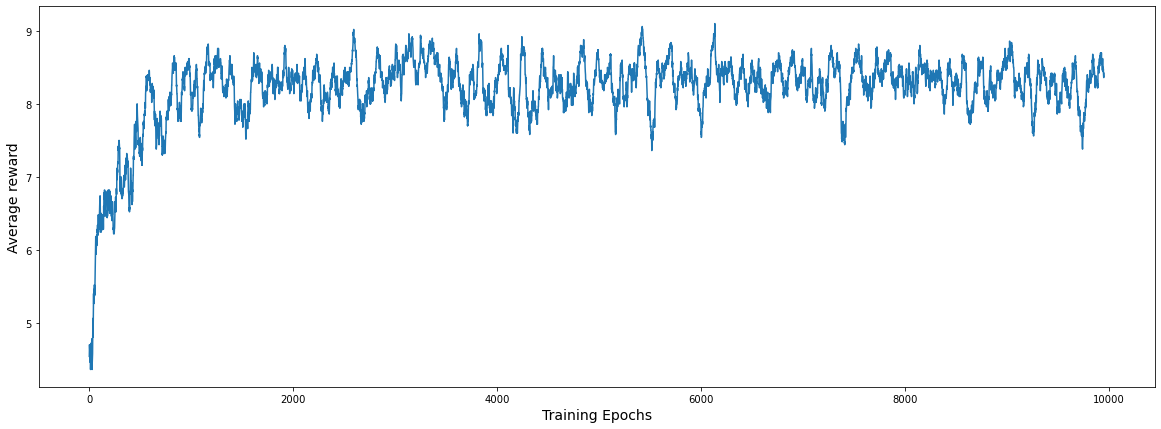

In [24]:
def running_mean(x,N =100): #定義一個可以算出移動平均回饋值的函式
    c = x.shape[0] - N
    y = np.zeros(c)
    conv = np.ones(N)
    for i in range(c):
        y[i] = (x[i:i+N] @ conv)/N
    return y

plt.figure(figsize=(20,7))
plt.ylabel("Average reward",fontsize=14)
plt.xlabel("Training Epochs",fontsize=14)
plt.plot(running_mean(rewards,N=50))